# Deals wave data from ERA5 

Load wave data from ERA5 from a NetCDF (nc) file

The 'nc' file was downloaded using the API generated at

https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form

Selected the nearest point from the ADCP to extract a time series  (the same point of WW3!)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import pickle

Python - NetCDF reading and writing example with plotting

http://schubert.atmos.colostate.edu/~cslocum/netcdf_example.html

Figure copied from 'Vento_ERA5_WW3.ipynb', which shows the coordinates poits from both models and the ADCP position

The ERA5 model resolution for waves is 0,5o = WW3

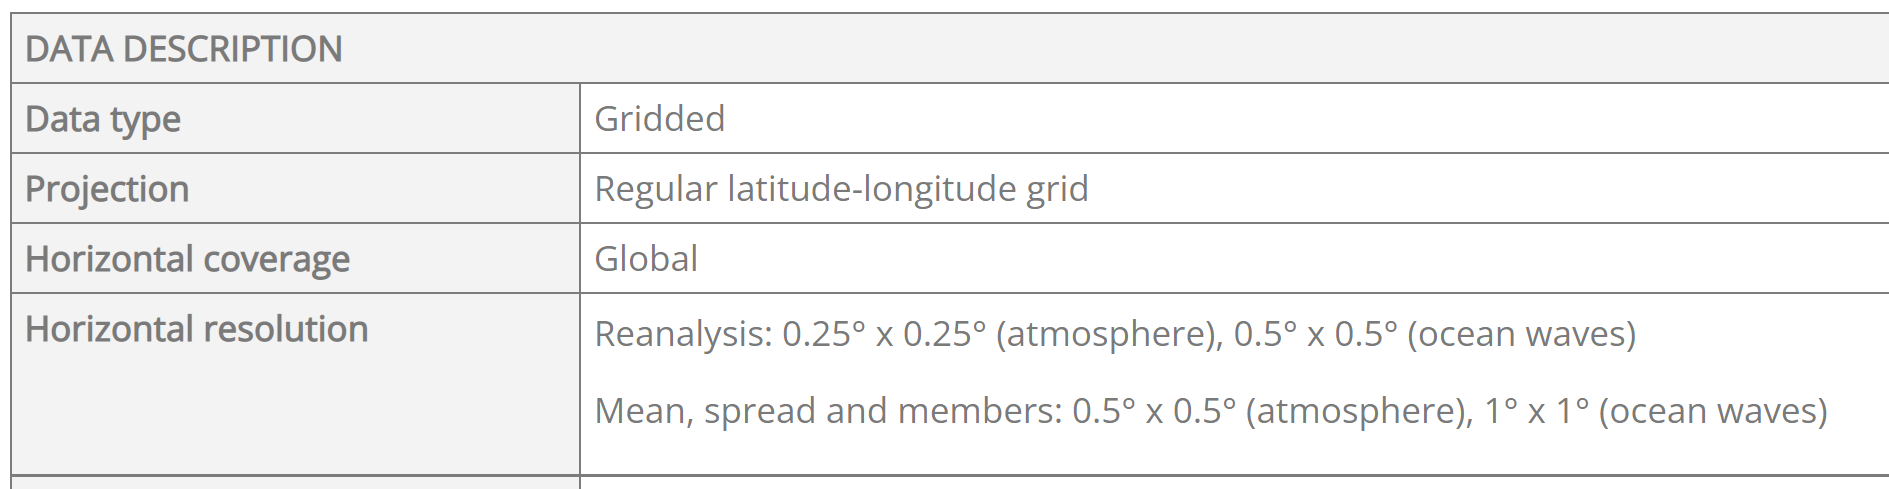


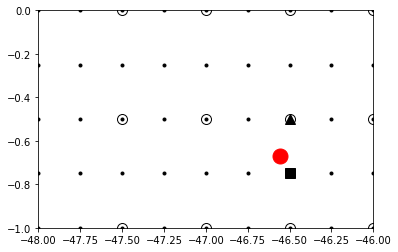

In [11]:
mod = netCDF4.Dataset('ERA_waves_download.nc')

# to find out the variables fields

for i in mod.variables:
    print([i, mod.variables[i].units, mod.variables[i].shape])

['longitude', 'degrees_east', (7,)]
['latitude', 'degrees_north', (6,)]
['time', 'hours since 1900-01-01 00:00:00.0', (26304,)]
['mwd', 'Degree true', (26304, 6, 7)]
['mwp', 's', (26304, 6, 7)]
['swh', 'm', (26304, 6, 7)]


-46.5 -0.5


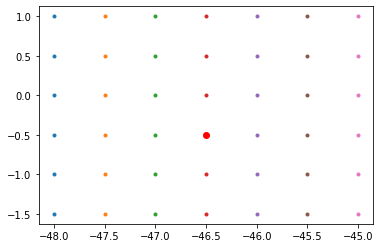

In [12]:
lat = mod.variables['latitude'][:]
lon = mod.variables['longitude'][:]

lat = np.array(lat)
lon = np.array(lon)

lonlon, latlat = np.meshgrid(lon, lat)

plt.plot(lonlon, latlat, '.')

# to be sure we are getting the rigth point!!!!
px = 3
py = 3
plt.plot(lonlon[py, px], latlat[py, px], 'ro')
print(lonlon[py, px], latlat[py, px])

plt.show()

In [13]:
# get the time series of height, period and direction for each point

wh = mod.variables['swh'][:, py, px]
wp = mod.variables['mwp'][:, py, px]
wd = mod.variables['mwd'][:, py, px]

wh.shape

(26304,)

In [14]:
# Transforms the time of the model to datetime 

#https://stackoverflow.com/questions/60958754/typeerror-class-cftime-cftime-datetimegregorian-is-not-convertible-to-date

pega_tempo = mod.variables['time']

tempo = netCDF4.num2date(pega_tempo, pega_tempo.units, only_use_cftime_datetimes=False)

print(tempo[0])
print(tempo[0:3])

2015-01-01 00:00:00
[real_datetime(2015, 1, 1, 0, 0) real_datetime(2015, 1, 1, 1, 0)
 real_datetime(2015, 1, 1, 2, 0)]


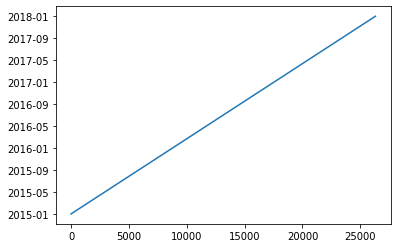

In [15]:
plt.plot(tempo)

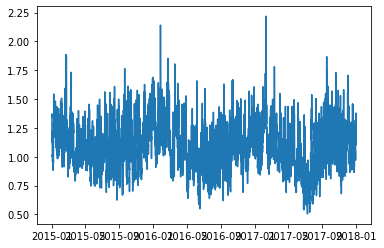

In [16]:
plt.plot(tempo, wh)

In [17]:
# saving!

hdr ='''
Dados de onda do ERA5 para coordenadas 

longitude: -46.5 
latitude: -0.5

para o período de 2015 até 2017

[tempo, altura, periodo, direcao]
'''

j = [hdr, tempo, wh, wp, wd]

# with open('Ondas_ERA5_2015_2017.pkl', 'wb') as io:
#     pickle.dump(j, io)